# Minería de Datos: Trabajo Final:

### Importación de las librerías necesarias:

In [1]:
# Importación de bibliotecas generales
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de matplotlib para interactividad
plt.ion()  # Mantén la interactividad de matplotlib

# Importación de herramientas de preprocesamiento y transformación de sklearn
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer
from sklearn.impute import SimpleImputer
import category_encoders as ce
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

# Importación de herramientas de modelado y evaluación de sklearn
from sklearn import neighbors, model_selection, metrics
from sklearn.base import BaseEstimator, TransformerMixin

# Configuración de la visualización de diagramas de sklearn
from sklearn import set_config
set_config(display="diagram")


### Lectura de datos:

Leemos los datos:

In [2]:
data_path = 'data/data.csv'
data = pd.read_csv(data_path, index_col=0)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Análisis de tipos de datos y nulos:

In [3]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
variables_numericas = ['tenure', 'MonthlyCharges', 'TotalCharges']

variables_categoricas = [
    "gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", 
    "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", 
    "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", 
    "Contract", "PaperlessBilling", "PaymentMethod"
]

Verificamos a ver si hay valores nulos, vacíos o espacios:

In [5]:
# Contar cuántos valores son exactamente ' ' en cada columna
conteo_espacios = (data == ' ').sum()
print("Conteo de espacios en blanco (' '):")
print(conteo_espacios)

# Verificar la cantidad de valores nulos (NaN) en cada columna
conteo_nulos = data.isnull().sum()
print("\nConteo de valores nulos:")
print(conteo_nulos)

# Contar cuántos valores son cadenas vacías ('') en cada columna
conteo_cadenas_vacias = (data == '').sum()
print("\nConteo de cadenas vacías (''):")
print(conteo_cadenas_vacias)


Conteo de espacios en blanco (' '):
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Conteo de valores nulos:
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Conteo de c

Podemos comprobar como la variable TotalCharges es de tipo objeto debido a que tiene valores perdidos representados como ' '. Para solicionar esto, vamos a convertir la variable a tipo numérico.

In [6]:
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors='coerce')

### Análisis de los datos:

Separamos los datos en X e y:

In [7]:
variablesEntrada = data.columns[:-1]
variableSalida = data.columns[-1]

X = data.iloc[:, :-1].copy()
y = data.iloc[:,-1].copy()

Convertimos las categorías a números con codificación ordinal:

In [8]:
y[y == "No"] = 0
y[y == "Yes"] = 1
y = y.astype(int)

Analizamos la distribución de las clases de salida:

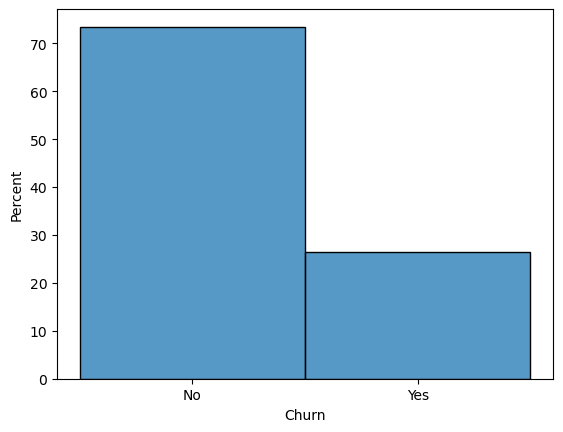

In [9]:
clase_0 = "No"
clase_1 = "Yes"

sns.histplot(data=y, bins=2, stat='percent', discrete=True)
plt.xticks([0, 1], [clase_0, clase_1])
plt.show()

Podemos observar que las clases están algo desbalanceadas, pero puede tratarse debido a que las reseñas neutrales y no satisfechas están agrupadas.

Visualizamos la distribución de las variables numéricas:

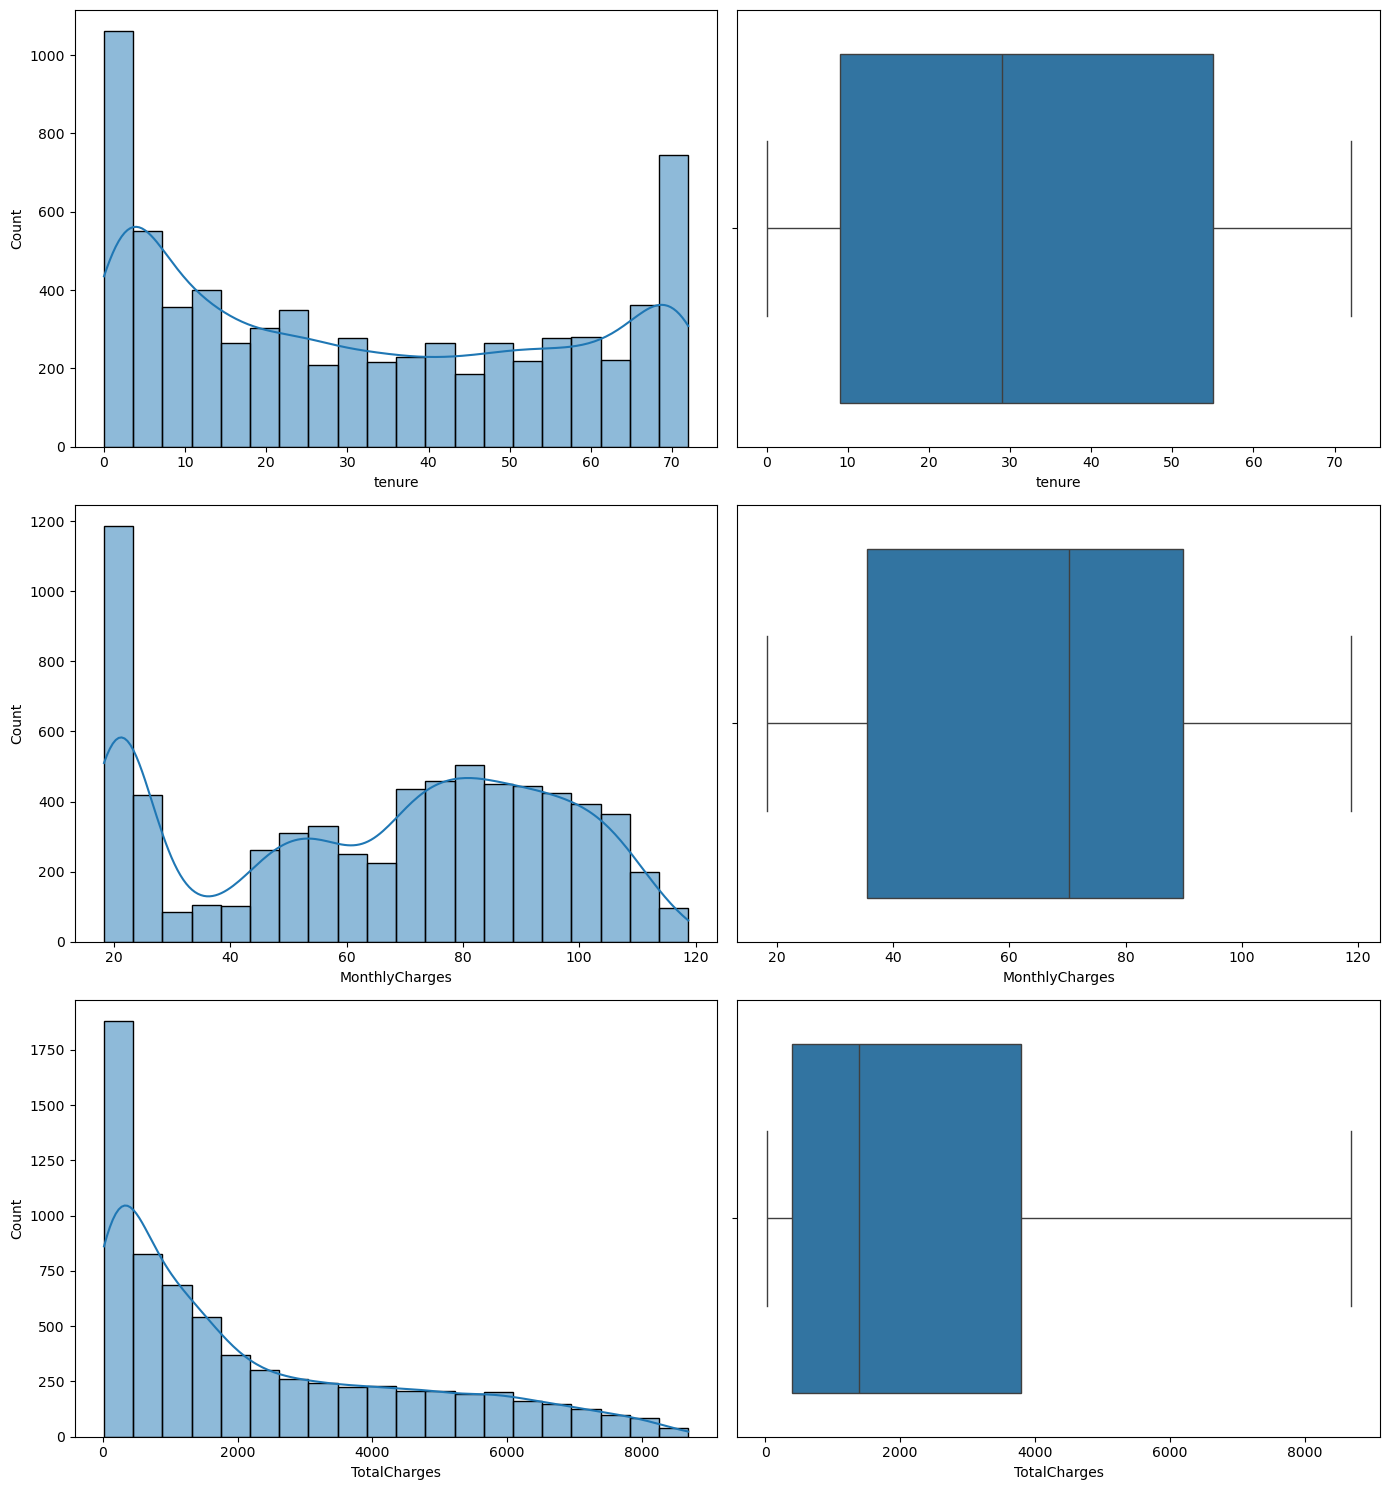

In [10]:
fig, axes = plt.subplots(nrows=len(variables_numericas), ncols=2, figsize=(14, 15))

for i in range(len(variables_numericas)):
    sns.histplot(data=X, x=variables_numericas[i], ax=axes[i, 0], bins=20, kde=True)
    sns.boxplot(data=X, x=variables_numericas[i], ax=axes[i, 1])

fig.tight_layout()

Tenure: Picos en los extremos (muchos clientes nuevos y bastantes viejos). boxplot sin valores atipicos.

Monyhly charges: Un gran número de clientes con cargos bajos y una distribución dispersa en valores más altos. Boxplot con dispersion sin valores extremos.

Total charges: Mayoría valores bajos (En esta podríamos usar lo que hemos dado hoy en clase para cambiar distribución con la raiz o log). Boxplot muestra mucha dispersión y probablemente valores extremos.

Visualizamos la distribución de las variables categóricas:

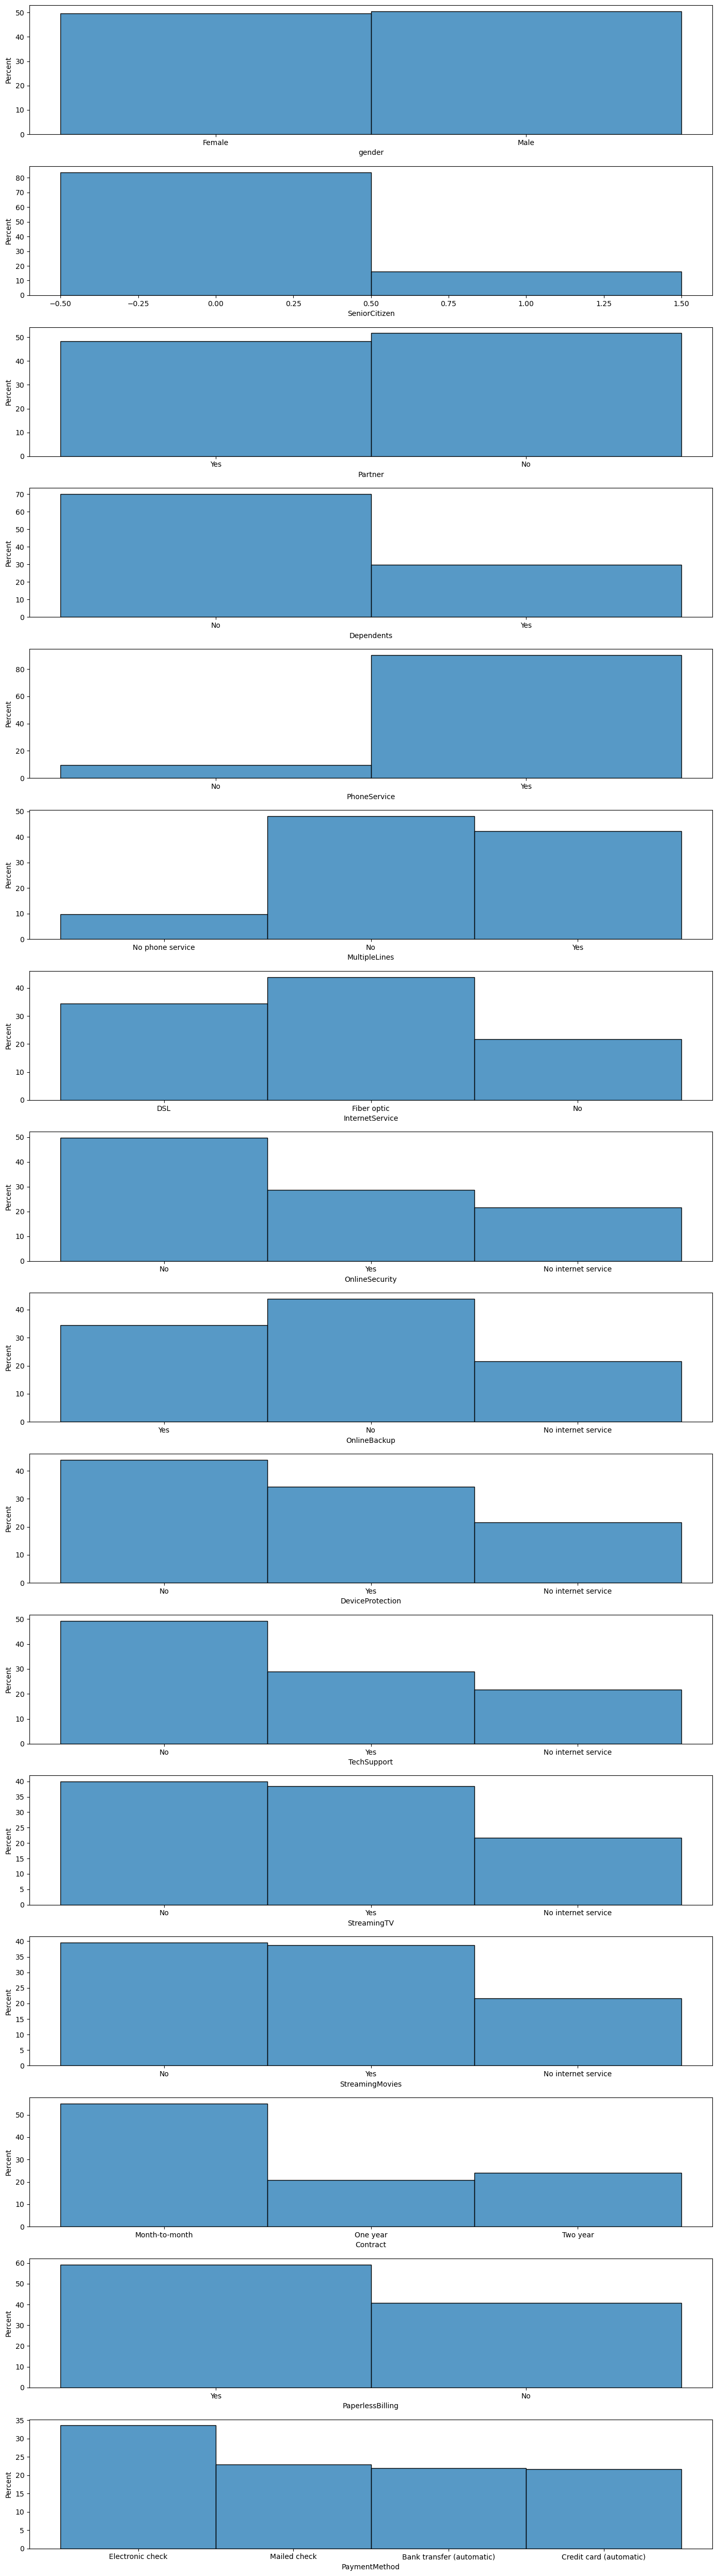

In [11]:
fig, axes = plt.subplots(nrows=len(variables_categoricas), ncols=1, figsize=(14, 50))

for i in range(len(variables_categoricas)):
    sns.histplot(data=X, x=variables_categoricas[i], stat='percent', discrete=True, ax=axes[i])

fig.tight_layout()

Gender: Equilibrado

Senior citizen: Desequlibrada (mayoria no son senior)

Partner: Equilibrada

Dependemts: Desequilibrada (mayoria no tienen)

Phonr service: Desequlibrada (mayoria tienen)

MultipleLines: Equilibrio entre no y si,pero desequilibrio con sin servicio

InternetService: 

OnlineSecurity/ OnlineBackup/ DeviceProtection/ TechSupport: En todas estas categorías, hay más 
clientes sin estos servicios que con ellos, y un segmento sin servicio de internet.

Streaming TV/ Streaming Movies: Distribución similar: hay más clientes sin estos servicios que con ellos, y algunos sin internet.

Contract: La mayoría de los clientes tienen contrato mensual.

PaperlessBilling:Ligeramente desbalanceada

PaymentMethod: Una clase con mas y tres menores balanceadas

Visualizamos la relación entre las variables numéricas y la salida:

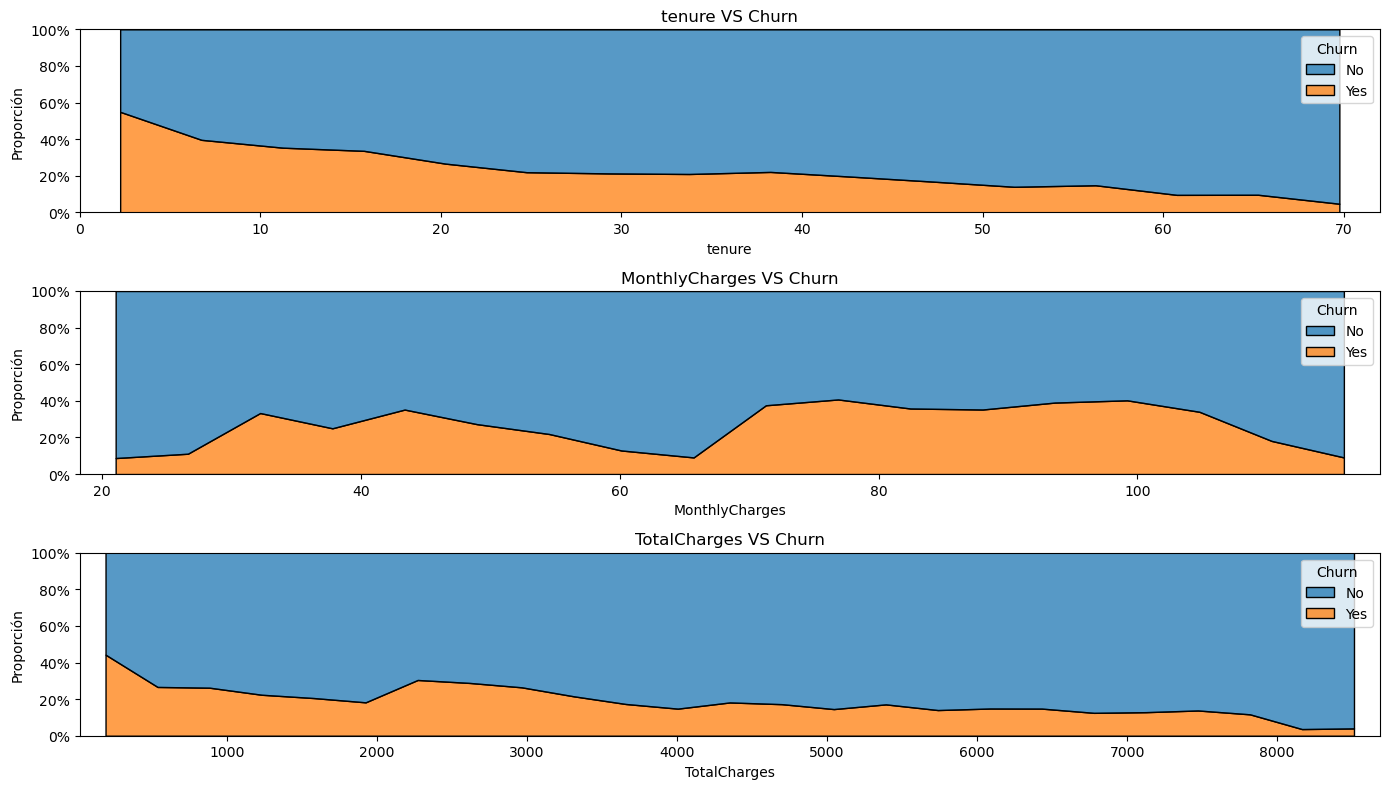

In [12]:
fig, axes = plt.subplots(nrows=len(variables_numericas), ncols=1, figsize=(14, 8))

for i in range(len(variables_numericas)):
    sns.histplot(
        data=data,
        x=variables_numericas[i],
        hue=variableSalida,
        ax=axes[i],
        element='poly',
        stat='probability',
        multiple='fill' 
    )
    axes[i].set_ylabel('Proporción')
    axes[i].set_title(f'{variables_numericas[i]} VS {variableSalida}')
    axes[i].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

plt.tight_layout()
plt.show()


Visualizamos la relación entre las variables categóricas y la salida:

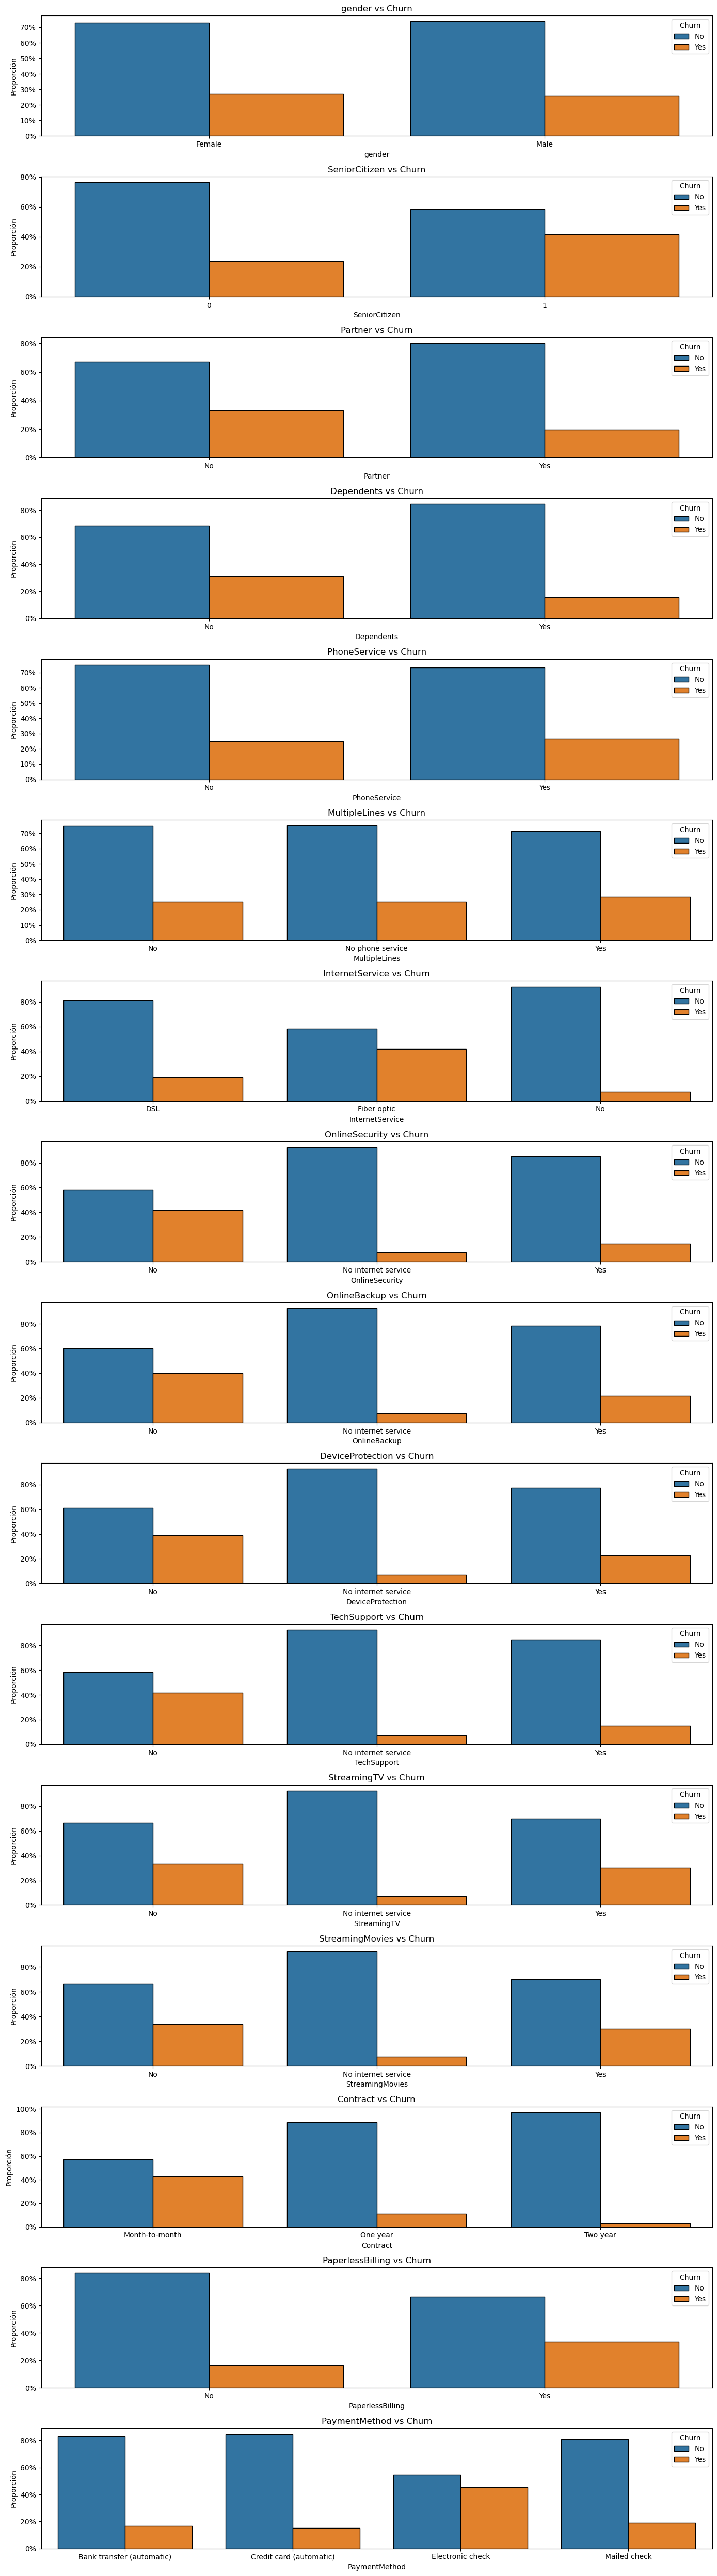

In [13]:
fig, axes = plt.subplots(nrows=len(variables_categoricas), ncols=1, figsize=(14, 50))

for i, var in enumerate(variables_categoricas):
    # Calculamos la proporción condicional P(clase | categoría)
    prop_df = (
        data.groupby([var, variableSalida])
        .size()
        .reset_index(name='count')
    )

    # Normalizamos dentro de cada categoría
    prop_df['proportion'] = prop_df.groupby(var)['count'].transform(lambda x: x / x.sum())

    sns.barplot(
        data=prop_df,
        x=var,
        y='proportion',
        hue=variableSalida,
        ax=axes[i],
        edgecolor='black', 
        linewidth=1 
    )

    axes[i].set_ylabel('Proporción')
    axes[i].set_title(f'{var} vs {variableSalida}')
    axes[i].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

plt.tight_layout()
plt.show()

1. **Género:** No parece haber una diferencia significativa en la tasa de churn entre hombres y mujeres.
2. **Senior Citizen:** Los clientes mayores (senior citizens) tienen una mayor proporción de churn en comparación con los más jóvenes.
3. **Partner (Pareja):** Los clientes sin pareja parecen tener una mayor tasa de churn que aquellos que tienen pareja.
4. **Dependents (Dependientes):** Los clientes sin dependientes tienen una mayor tasa de churn.
5. **Phone Service:** La mayoría de los clientes tienen servicio telefónico, pero no se observa una gran diferencia en churn entre los que lo tienen y los que no.
6. **Multiple Lines:** Los clientes con múltiples líneas parecen tener una tasa de churn mayor en comparación con los que tienen una sola línea o no tienen servicio telefónico.
7. **Internet Service:** La tasa de churn varía según el tipo de servicio de internet, donde los que tienen servicio de fibra óptica parecen tener una tasa de churn más alta en comparación con DSL y los que no tienen internet.
8. **Online Security y Online Backup:** Los clientes que no tienen estos servicios parecen tener una mayor tasa de churn.
9. **Device Protection y Tech Support:** Similar a los anteriores, los clientes sin estos servicios presentan mayor churn.
10. **Streaming TV y Streaming Movies:** No tener estos servicios parece estar asociado con una mayor tasa de churn.
11. **Contract:** Los clientes con contratos mensuales tienen una tasa de churn significativamente más alta en comparación con los que tienen contratos a uno o dos años.
12. **Paperless Billing:** Los clientes con facturación electrónica parecen tener mayor churn en comparación con los que reciben facturas físicas.
13. **Payment Method:** Los clientes que pagan con cheque electrónico tienen la mayor tasa de churn, mientras que los que usan tarjeta de crédito o transferencias bancarias automáticas tienen menor churn.

### Conclusión:
- **Factores que aumentan el churn:** Ser una persona mayor, no tener pareja o dependientes, usar pago con cheque electrónico, tener un contrato mensual, y no contar con servicios adicionales como soporte técnico o seguridad en línea.
- **Factores que reducen el churn:** Tener contratos más largos (uno o dos años), pagar automáticamente con tarjeta o transferencia, y suscribirse a servicios adicionales.


Visualizamos las relaciones entre las variables numéricas:

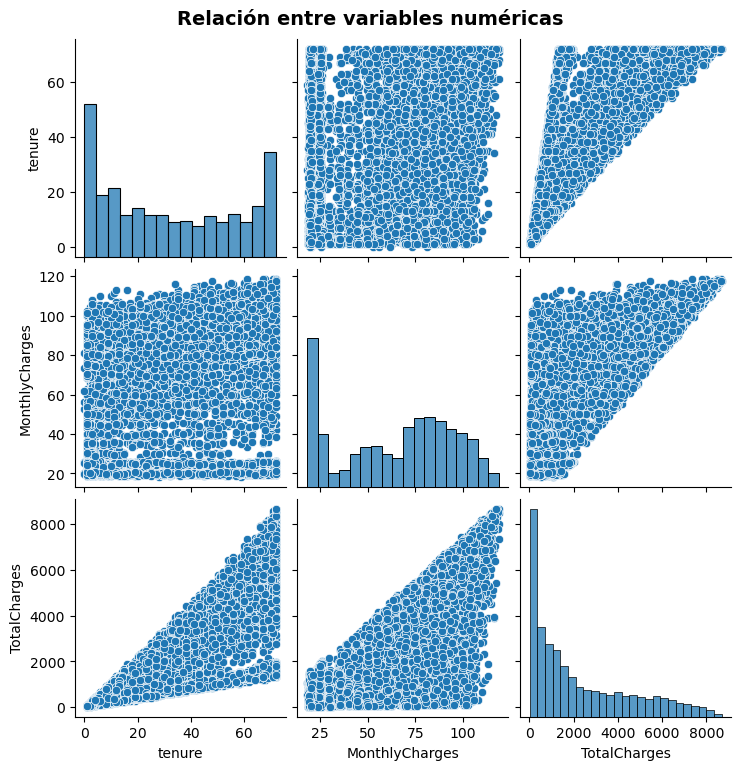

In [14]:
sns.pairplot(data=X[variables_numericas], kind='scatter', diag_kind='hist', height=2.5)
plt.suptitle('Relación entre variables numéricas', y=1.02, fontsize=14, fontweight="bold")
plt.show()

1. **Distribuciones individuales:**
   - **Tenure:** Hay más clientes con poca antigüedad, lo que sugiere que muchas personas cancelan temprano o que hay un flujo constante de nuevos clientes.
   - **MonthlyCharges:** Presenta una distribución uniforme con valores entre aproximadamente 20 y 120.
   - **TotalCharges:** Tiene una distribución sesgada hacia la izquierda, con más clientes con cargos totales bajos (probablemente porque llevan poco tiempo en la empresa).

2. **Relaciones entre variables:**
   - **Tenure vs. MonthlyCharges:** No parece haber una correlación clara entre el tiempo de antigüedad y el monto de los cargos mensuales.
   - **Tenure vs. TotalCharges:** Existe una clara relación lineal positiva, lo cual tiene sentido porque mientras más tiempo un cliente permanezca, mayor será su cargo total.
   - **MonthlyCharges vs. TotalCharges:** También hay una correlación positiva, pero con más dispersión, ya que los cargos totales dependen tanto del monto mensual como de la duración del cliente.

### Conclusión:
- **Los clientes nuevos tienen cargos totales bajos, lo que es esperable.**
- **Los clientes con mayor tiempo tienen cargos totales más altos.**
- **No hay una relación clara entre la antigüedad del cliente y el monto de su cargo mensual.**



### Tratamiento de los valores nulos:

Como se ha mencionado anteriormente, hemos encontrado valores nulos en la variable "TotalCharges". Por ello, hemos decidido sustituir estos valores por la media del atributo.

### Transformación de variables: categórica a numérica:

En nuestro problema tenemos algunas variables categóricas. Estas deben ser convertidas a numéricas, ya que más adelante, cuando necesitemos aplicar un modelo de aprendizaje automático éstas nos darán problemas. Como primera prueba, comenzaremos utilizando la codificación binaria.

Las variables categóricas disponibles son las siguientes:

- gender
- SeniorCitizen
- Partner
- Dependents
- PhoneService
- MultipleLines
- InternetService
- OnlineSecurity
- OnlineBackup
- DeviceProtection
- TechSupport
- StreamingTV
- StreamingMovies
- Contract
- PaperlessBilling
- PaymentMethod

Sin embargo, no necesitamos codificar todas, ya que SeniorCitizen ya viene codificada en binario.


### Pipelines de preprocesamiento:

Para aplicar el preprocesamiento de manera más sencilla y evitar errores que nos lleven a cometer Data Leakage, crearemos una Pipeline que se encargue de aplicar este preprocesamiento de manera adecuada.

Primero creamos la Pipeline que preprocesará las variables categóricas aún NO codificadas:

In [15]:
categorical_preprocessor = Pipeline(steps=[
    ('binary_encoder', ce.BinaryEncoder())
])

Crearemos otra Pipeline que se encargue de preprocesar las variables con valores faltantes:

In [16]:
nan_preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

Creamos un ColumnTransformer que se encargue de transformar todas las variables:

In [17]:
variables_categoricas = ["gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService",
            "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup",
            "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies",
            "Contract", "PaperlessBilling", "PaymentMethod"]

# Variables con valores faltantes
variables_nan = ["TotalCharges"]

variables_numericas_correctas = ['tenure', 'MonthlyCharges']

# Creamos el preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        # Codificamos las variables categóricas
        ('categorical_preprocessor', categorical_preprocessor, variables_categoricas),

        # Imputamos valores en las variables con valores faltantes
        ('nan_preprocessor', nan_preprocessor, variables_nan),
    ],
    # Las demás variables las dejamos igual
    remainder="passthrough"
)

Probamos el preprocesador creado:

In [18]:
X_modified = preprocessor.fit_transform(X)

# Visualizamos los datos transformados
pd.DataFrame(X_modified).head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,29.85,1.0,29.85
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1889.50,34.0,56.95
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,108.15,2.0,53.85
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1840.75,45.0,42.30
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,151.65,2.0,70.70


### Pipeline con preprocesamiento y KNN:

El modelo base consistirá en el preprocesador creado previamente, combinado con un KNeighborsClassifier utilizando los valores predeterminados de los hiperparámetros.

Dividimos los datos en train, validación y test:

In [19]:
X_resto, X_test, y_resto, y_test = model_selection.train_test_split(X, y, test_size=0.1, stratify=y, random_state=1234)
X_train, X_val, y_train, y_val = model_selection.train_test_split(X_resto, y_resto, train_size=0.8, stratify=y_resto, random_state=1234)

Definimos una función que entrene el clasificador y devuelva el área bajo la curva (AUC) tanto para el conjunto de entrenamiento como para el de validación, además de la matriz de confusión.

In [20]:
def obtener_resultados(modelo, X_train, y_train, X_val, y_val):
    modelo.fit(X_train, y_train)
    # Calculamos el AUC PR en train
    y_train_prob = modelo.predict_proba(X_train)[:, 1]
    train_auc_pr = metrics.average_precision_score(y_train, y_train_prob) * 100
    # Calculamos el AUC PR en valiación
    y_val_prob = modelo.predict_proba(X_val)[:, 1]
    val_auc_pr = metrics.average_precision_score(y_val, y_val_prob) * 100

    # Calculamos la matriz de confusión en train
    y_train_pred = modelo.predict(X_train)
    cm_train = metrics.confusion_matrix(y_train, y_train_pred)
    # Calculamos la matriz de confusión en valiación
    y_val_pred = modelo.predict(X_val)
    cm_val = metrics.confusion_matrix(y_val, y_val_pred)
    
    return train_auc_pr, val_auc_pr, cm_train, cm_val

Definimos una función para mostrar los resultados:

In [21]:
def mostrar_resultados(train_auc_pr, val_auc_pr, cm_train, cm_val, class_names=None):
    # Imprimir AUC PR
    print(f"AUC-PR (Train): {train_auc_pr:.4f}")
    print(f"AUC-PR (Validación): {val_auc_pr:.4f}")

    # Normalizar matrices por fila (por clase real)
    cm_train_norm = cm_train.astype('float') / cm_train.sum(axis=1)[:, np.newaxis]
    cm_val_norm = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis]

    # Configurar los nombres de las clases si no se dan
    if class_names is None:
        class_names = [str(i) for i in range(cm_train.shape[0])]

    # Mostrar mapas de calor con porcentajes
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    sns.heatmap(
        cm_train_norm,
        annot=True,
        fmt=".1%",
        cmap="Blues",
        xticklabels=class_names,
        yticklabels=class_names,
        ax=axes[0]
    )
    axes[0].set_title("Matriz de Confusión - Entrenamiento")
    axes[0].set_xlabel("Etiqueta Predicha")
    axes[0].set_ylabel("Etiqueta Real")

    sns.heatmap(
        cm_val_norm,
        annot=True,
        fmt=".1%",
        cmap="Blues",
        xticklabels=class_names,
        yticklabels=class_names,
        ax=axes[1]
    )
    axes[1].set_title("Matriz de Confusión - Validación")
    axes[1].set_xlabel("Etiqueta Predicha")
    axes[1].set_ylabel("Etiqueta Real")

    plt.tight_layout()
    plt.show()

AUC-PR (Train): 71.1735
AUC-PR (Validación): 51.9016


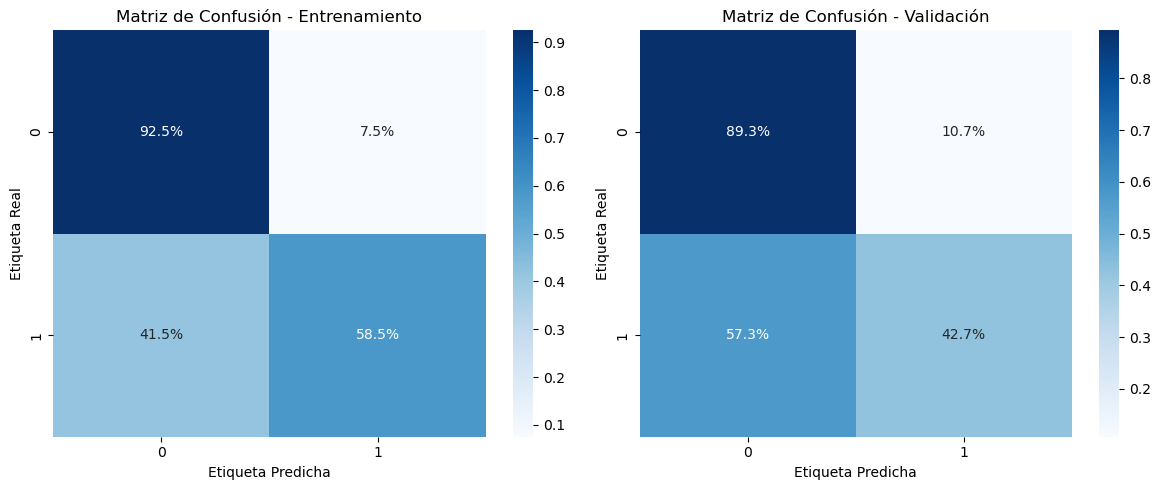

In [22]:
modelo = Pipeline([
    ('preprocessor', preprocessor),
    ('knn', neighbors.KNeighborsClassifier())
])

train_auc_pr, val_auc_pr, cm_train, cm_val = obtener_resultados(modelo, X_train, y_train, X_val, y_val)
mostrar_resultados(train_auc_pr, val_auc_pr, cm_train, cm_val)

### Normalización de las variables:

Probaremos las siguientes normalizaciones de las variables:

- Estandarización mediante la media y la desviación estándar (Z-score)
- Estandarización mediante el mínimo y el máximo (min-max)
- Estandarización Z-score para las variables numéricas y estandarización min-max para variables categóricas

Definimos una función para comparar los resultados:

In [23]:
def comparar_resultados(resultados, figsize=(10, 6), y_lim=None):
    nombres = [r['nombre_prueba'] for r in resultados]
    train_scores = [r['train_auc_pr'] for r in resultados]
    val_scores = [r['val_auc_pr'] for r in resultados]

    x = np.arange(len(nombres))  # posiciones en el eje X
    width = 0.35  # ancho de las barras

    fig, ax = plt.subplots(figsize=figsize)
    bars1 = ax.bar(x - width/2, train_scores, width, label='Train AUC-PR')
    bars2 = ax.bar(x + width/2, val_scores, width, label='Validation AUC-PR')

    ax.set_ylabel('AUC-PR')
    ax.set_title('Comparación de AUC-PR')
    ax.set_xticks(x)
    ax.set_xticklabels(nombres, rotation=45, ha='right', fontsize=8)
    ax.legend()
    ax.grid(True, axis='y', linestyle='--', alpha=0.6)

    # Aplicar límites del eje Y si se proporciona
    if y_lim is not None:
        ax.set_ylim(y_lim)

    # Mostrar los valores encima de las barras
    for bar in bars1 + bars2:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    plt.tight_layout()
    plt.show()


In [24]:
numerical_scalers = ["passthrough", StandardScaler(), MinMaxScaler()]

resultados = []

for numerical_scaler in numerical_scalers:
    # Definimos el preprocesador de variables categóricas
    categorical_preprocessor = Pipeline(steps=[
        ('binary_encoder', ce.BinaryEncoder())
    ])
    # Definimos el preprocesador de variables numéricas
    # Preprocesador para variables numéricas con valores faltantes
    nan_preprocessor = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', numerical_scaler)
    ])
    # Preprocesador para variables numéricas sin valores faltantes
    numerical_preprocessor = Pipeline(steps=[
        ('scaler', numerical_scaler)
    ]) 

    # Creamos el preprocesador final
    preprocessor = ColumnTransformer(
        transformers=[
            # Codificamos las variables categóricas
            ('categorical_preprocessor', categorical_preprocessor, variables_categoricas),

            # Imputamos valores en las variables con valores faltantes
            ('nan_preprocessor', nan_preprocessor, variables_nan),

            ('numerical_preprocessor', numerical_preprocessor, variables_numericas_correctas)
        ]
    )

    # Creamos el modelo
    modelo = Pipeline([
        ('preprocessor', preprocessor),
        ('knn', neighbors.KNeighborsClassifier())
    ])
    # Obtenemos los resultados
    train_auc_pr, val_auc_pr, cm_train, cm_val = obtener_resultados(modelo, X_train, y_train, X_val, y_val)

    resultado = {"nombre_prueba" : "Scaler numérico: " + str(numerical_scaler),
               "train_auc_pr" : train_auc_pr,
               "val_auc_pr" : val_auc_pr}
    
    resultados.append(resultado)

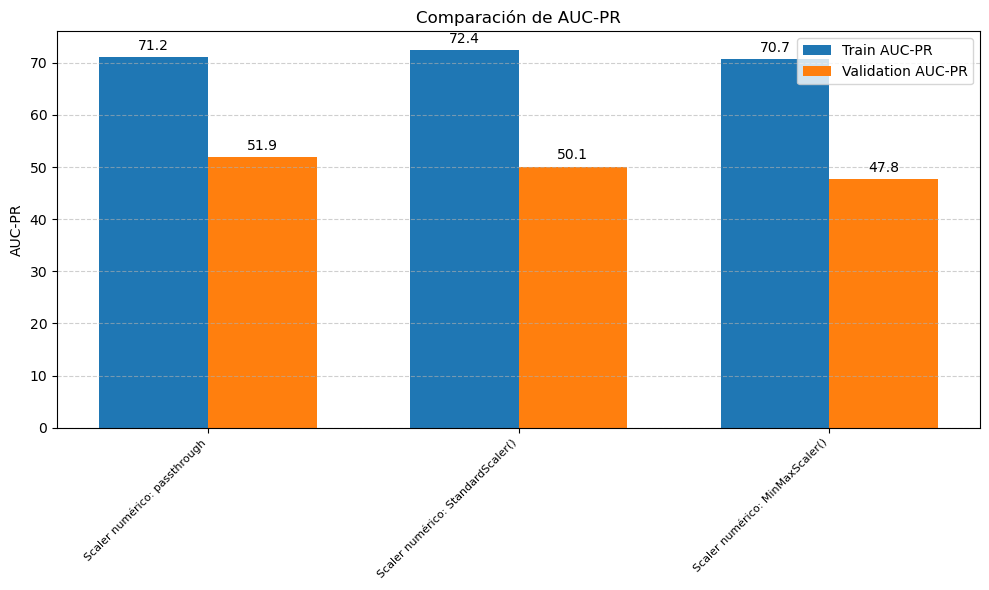

In [25]:
comparar_resultados(resultados)

Podemos observar que la opción más conveniente es no normalizar las variables numéricas. Esto probablemente se debe a que una de las variables numéricas tiene una alta relevancia en el modelo. Al aplicar una normalización, se reduce su escala relativa, lo que provoca que su influencia en el cálculo de distancias (especialmente en modelos como KNN) disminuya. En consecuencia, su aporte a la clasificación final se vuelve menos significativo en comparación con dejarla en su escala original.

### Detección de outliers:

Probaremos distintos detectores de outliers tanto para las variables categóricas como las variables numéricas, para ver cual se adapta mejor al problema.

Clase encargada de detectar outliers mediante el método del rango intercuartil.

In [26]:
# Importamos la clase TransformerMixin
from sklearn.base import TransformerMixin

# Creamos la clase de detección y tratamiento de Outliers
class OutlierDetecion_treatment_IQR(TransformerMixin):

    # Constructor de la clase
    def __init__(self, k=1.5, columns=None):
        self.k = k
        self.columns = columns
    
    # Método fit
    def fit(self, X, y=None):
        # Transformamos X a DataFrame por si llega un array de Numpy (para compatibilidad en la Pipeline)
        X = pd.DataFrame(X)
        if self.columns == None:
            # Si no se determinan variables en el constructor si tratan todas
            self.columns = X.columns
        self.stats = X[self.columns].describe()
        # Devolvemos el propio objeto modificado
        return self

    # Método transform
    def transform(self, X):
        # Transformamos X a DataFrame por si llega un array de Numpy (para compatibilidad en la Pipeline)
        X = pd.DataFrame(X)
        # Creamos una copia del DataFrame X para no perder los datos originales
        Xaux = X.copy()
        # Se calcula el IQR de cada variable
        IQRs = self.stats.loc['75%'] - self.stats.loc['25%']
        # Se calculan los límites inferiores y superiores   
        limiteInf = self.stats.loc['25%'] - self.k * IQRs
        limiteSup = self.stats.loc['75%'] + self.k * IQRs
        # Se comprueba qué elementos están por encima y por debajo de dichos límites (máscaras de booleanos)  
        menores = X[self.columns] < limiteInf
        mayores = X[self.columns] > limiteSup

        # Se recorren las variables para detectar outliers y tratarlos (sustituir por la mediana de la variable)
        for c in self.columns:
            # obtenemos la lista de booleanos correspondientes a si los valores de los ejemplos son outliers o no para la variable c
            indices = np.logical_or(menores[c], mayores[c])
            # Si hay outliers
            for idx in X[indices].index:
                # Los sustituimos por la mediana
                Xaux.at[idx, c] = self.stats.loc['50%'][c]
                
        # Se devuelve el DataFrame modificado
        return Xaux
    
    # Método para asignar los valores de los híper-parámetros y que, de este modo, 
        # podamos aplicar GridSearchCV sobre un objeto de esta clase
    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self
    
    # Método para obtener los valores de los híper-parámetros que queramos del modelo (lo usa GridSearchCV al mostrar la mejor configuración)
    def get_params(self, deep=True):
        # Devolvemos los valores de los híper-parámetros del método de preparación de datos
        return {"k": self.k}

Clase encargada de detectar outliers mediante el método de la media y la desviación.

In [27]:
# Creamos la clase de detección y tratamiento de Outliers
class OutlierDetecion_treatment_MeanStd(TransformerMixin):

    # Constructor de la clase
    def __init__(self, k=2, columns=None):
        self.k = k
        self.columns = columns
    
    # Método fit
    def fit(self, X, y=None):
        # Transformamos X a DataFrame por si llega un array de Numpy (para compatibilidad en la Pipeline)
        X = pd.DataFrame(X)
        if self.columns == None:
            # Si no se determinan variables en el constructor si tratan todas
            self.columns = X.columns
        self.stats = X[self.columns].describe()
        # Devolvemos el propio objeto modificado
        return self

    # Método transform
    def transform(self, X):
        # Transformamos X a DataFrame por si llega un array de Numpy (para compatibilidad en la Pipeline)
        X = pd.DataFrame(X)
        # Creamos una copia del DataFrame X para no perder los datos originales
        Xaux = X.copy()
        # Se calculan los límites inferiores y superiores   
        limiteInf = self.stats.loc['mean'] - self.k * self.stats.loc['std']
        limiteSup = self.stats.loc['mean'] + self.k * self.stats.loc['std']
        # Se comprueba qué elementos están por encima y por debajo de dichos límites (máscaras de booleanos)  
        menores = X[self.columns] < limiteInf
        mayores = X[self.columns] > limiteSup

        # Se recorren las variables para detectar outliers y tratarlos (sustituir por la mediana de la variable)
        for c in self.columns:
            # obtenemos la lista de booleanos correspondientes a si los valores de los ejemplos son outliers o no para la variable c
            indices = np.logical_or(menores[c], mayores[c])
            # Si hay outliers
            for idx in X[indices].index:
                # Los sustituimos por la mediana
                Xaux.at[idx, c] = self.stats.loc['50%'][c]
                
        # Se devuelve el DataFrame modificado
        return Xaux
    
    # Método para asignar los valores de los híper-parámetros y que, de este modo, 
        # podamos aplicar GridSearchCV sobre un objeto de esta clase
    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self
    
    # Método para obtener los valores de los híper-parámetros que queramos del modelo (lo usa GridSearchCV al mostrar la mejor configuración)
    def get_params(self, deep=True):
        # Devolvemos los valores de los híper-parámetros del método de preparación de datos
        return {"k": self.k}

In [28]:
class OutlierDetectionClipping_IQR(OutlierDetecion_treatment_IQR):
    def transform(self, X):
        """Versión que reemplaza outliers por los límites (clipping) en lugar de la mediana"""
        X = pd.DataFrame(X)
        Xaux = X.copy()
        IQRs = self.stats.loc['75%'] - self.stats.loc['25%']
        limiteInf = self.stats.loc['25%'] - self.k * IQRs
        limiteSup = self.stats.loc['75%'] + self.k * IQRs
        
        # Aplicar clipping en lugar de reemplazo por mediana
        for col in self.columns:
            Xaux[col] = Xaux[col].clip(lower=limiteInf[col], upper=limiteSup[col])
        
        return Xaux
    
class OutlierDetectionClipping_MeanStd(OutlierDetecion_treatment_MeanStd):
    def transform(self, X):
        """Versión con clipping para el método de media ± k*std"""
        X = pd.DataFrame(X)
        Xaux = X.copy()
        limiteInf = self.stats.loc['mean'] - self.k * self.stats.loc['std']
        limiteSup = self.stats.loc['mean'] + self.k * self.stats.loc['std']
        
        # Clipping en lugar de mediana
        for col in self.columns:
            Xaux[col] = Xaux[col].clip(lower=limiteInf[col], upper=limiteSup[col])
        
        return Xaux

In [29]:
# Lista de detectores para variables categóricas y numéricas
outlier_detectors_categoricas = ["passthrough", OutlierDetecion_treatment_MeanStd(), OutlierDetecion_treatment_IQR(), OutlierDetectionClipping_IQR(), OutlierDetectionClipping_MeanStd()]
outlier_detectors_numericas = ["passthrough", OutlierDetecion_treatment_MeanStd(), OutlierDetecion_treatment_IQR(), OutlierDetectionClipping_IQR(), OutlierDetectionClipping_MeanStd()]

resultados = []

# Probamos cada combinación de detectores
for detector_cat in outlier_detectors_categoricas:
    for detector_num in outlier_detectors_numericas:
        
        # Preprocesador para variables categóricas
        categorical_preprocessor = Pipeline(steps=[
            ('binary_encoder', ce.BinaryEncoder()),
            ('outlier_detector', detector_cat)
        ])

        # Preprocesador para variables numéricas con valores faltantes
        nan_preprocessor = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('outlier_detector', detector_num)
        ])

        # Preprocesador para variables numéricas sin valores faltantes
        numerical_preprocessor = Pipeline(steps=[
            ('outlier_detector', detector_num)
        ])

        # Preprocesamiento completo
        preprocessor = ColumnTransformer(
            transformers=[
                ('categorical_preprocessor', categorical_preprocessor, variables_categoricas),
                ('nan_preprocessor', nan_preprocessor, variables_nan),
                ('numerical_preprocessor', numerical_preprocessor, variables_numericas_correctas)
            ]
        )

        # Pipeline del modelo
        modelo = Pipeline([
            ('preprocessor', preprocessor),
            ('knn', neighbors.KNeighborsClassifier())
        ])

        # Evaluación
        train_auc_pr, val_auc_pr, cm_train, cm_val = obtener_resultados(modelo, X_train, y_train, X_val, y_val)

        detector_cat_name = detector_cat.__class__.__name__ if detector_cat != "passthrough" else detector_cat
        detector_num_name = detector_num.__class__.__name__ if detector_num != "passthrough" else detector_num

        resultados.append({
            "nombre_prueba": "Categóricas: " + detector_cat_name + "\nNuméricas: " + detector_num_name,
            "train_auc_pr": train_auc_pr,
            "val_auc_pr": val_auc_pr
        })

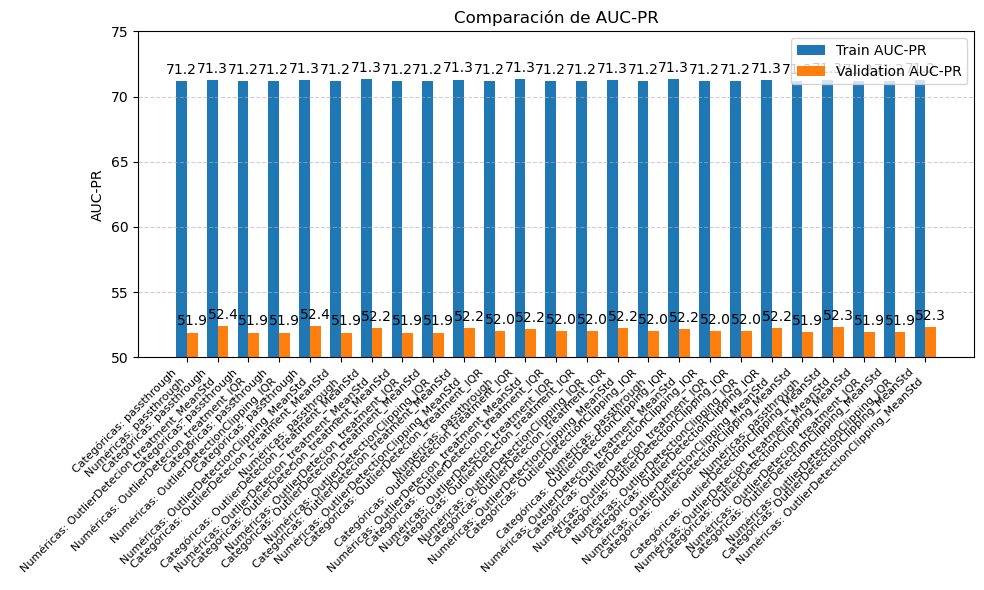

In [30]:
comparar_resultados(resultados, figsize=(10, 6), y_lim=(50, 75))

Continuaremos detectando outliers en las variables numéricas mediante el método de la media y la desviación estándar.

### Codificación de las variables categóricas:

In [31]:
encoders = [ce.BinaryEncoder(), ce.OneHotEncoder(), ce.CountEncoder(), ce.OrdinalEncoder(), ce.TargetEncoder()]

resultados = []

for encoder in encoders:
    # Definimos el preprocesador de variables categóricas
    categorical_preprocessor = Pipeline(steps=[
        ('encoder', encoder)
    ])
    # Definimos el preprocesador de variables numéricas
    # Preprocesador para variables numéricas con valores faltantes
    nan_preprocessor = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('outlier_detector', OutlierDetecion_treatment_MeanStd())
    ])

    # Preprocesador para variables numéricas sin valores faltantes
    numerical_preprocessor = Pipeline(steps=[
        ('outlier_detector', OutlierDetecion_treatment_MeanStd())
    ])

    # Creamos el preprocesador final
    preprocessor = ColumnTransformer(
        transformers=[
            # Codificamos las variables categóricas
            ('categorical_preprocessor', categorical_preprocessor, variables_categoricas),

            # Imputamos valores en las variables con valores faltantes
            ('nan_preprocessor', nan_preprocessor, variables_nan),

            ('numerical_preprocessor', numerical_preprocessor, variables_numericas_correctas)
        ]
    )

    # Creamos el modelo
    modelo = Pipeline([
        ('preprocessor', preprocessor),
        ('knn', neighbors.KNeighborsClassifier())
    ])
    # Obtenemos los resultados
    train_auc_pr, val_auc_pr, cm_train, cm_val = obtener_resultados(modelo, X_train, y_train, X_val, y_val)

    resultado = {"nombre_prueba" : "Encoder: " + str(encoder),
               "train_auc_pr" : train_auc_pr,
               "val_auc_pr" : val_auc_pr}
    
    resultados.append(resultado)

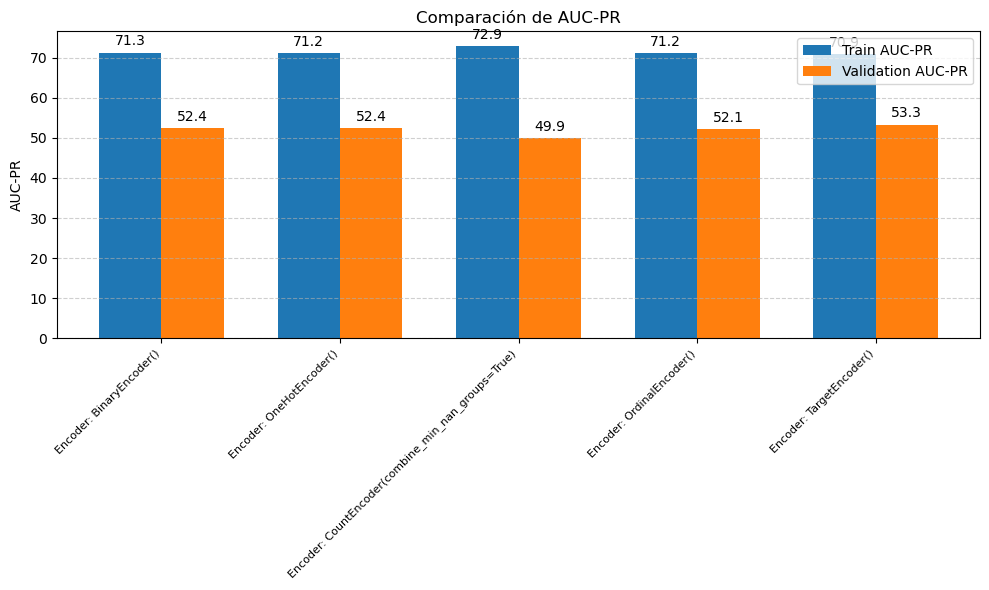

In [32]:
comparar_resultados(resultados)

Continuaremos con el codificador TargetEncoder.

### Modelos de aprendizaje automático:

Realizaremos varias pruebas con distintos modelos de aprendizaje automático, para ver cual se adapta mejor al problema.

In [33]:
# Lista de modelos con nombre e instancia
modelos = [
    ('KNN', KNeighborsClassifier()),
    ('RandomForest', RandomForestClassifier(random_state=0)),
    ('LogisticRegression', LogisticRegression(random_state=0)),
    ('SVC', SVC(probability=True, random_state=0)),
    ('DecisionTree', DecisionTreeClassifier(random_state=0)),
    ('GradientBoosting', GradientBoostingClassifier(random_state=0)),
    ('AdaBoost', AdaBoostClassifier(random_state=0))
]

resultados = []

for nombre_modelo, clf in modelos:
    # Preprocesador para variables categóricas
    categorical_preprocessor = Pipeline(steps=[
        ('encoder', ce.TargetEncoder())
    ])
    
    # Preprocesador para variables numéricas con valores faltantes
    nan_preprocessor = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('outlier_detector', OutlierDetecion_treatment_MeanStd())
    ])

    # Preprocesador para variables numéricas sin valores faltantes
    numerical_preprocessor = Pipeline(steps=[
        ('outlier_detector', OutlierDetecion_treatment_MeanStd())
    ])

    # ColumnTransformer que junta todos los preprocesamientos
    preprocessor = ColumnTransformer(
        transformers=[
            ('categorical_preprocessor', categorical_preprocessor, variables_categoricas),
            ('nan_preprocessor', nan_preprocessor, variables_nan),
            ('numerical_preprocessor', numerical_preprocessor, variables_numericas_correctas)
        ]
    )

    # Pipeline completo con el modelo
    modelo = Pipeline([
        ('preprocessor', preprocessor),
        ('clf', clf)
    ])

    # Ejecutamos evaluación
    train_auc_pr, val_auc_pr, cm_train, cm_val = obtener_resultados(modelo, X_train, y_train, X_val, y_val)

    resultado = {
        "nombre_prueba": f"Modelo: {nombre_modelo}",
        "train_auc_pr": train_auc_pr,
        "val_auc_pr": val_auc_pr
    }

    resultados.append(resultado)

c:\Users\Carlos\anaconda3\envs\py311ml\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Carlos\anaconda3\envs\py311ml\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


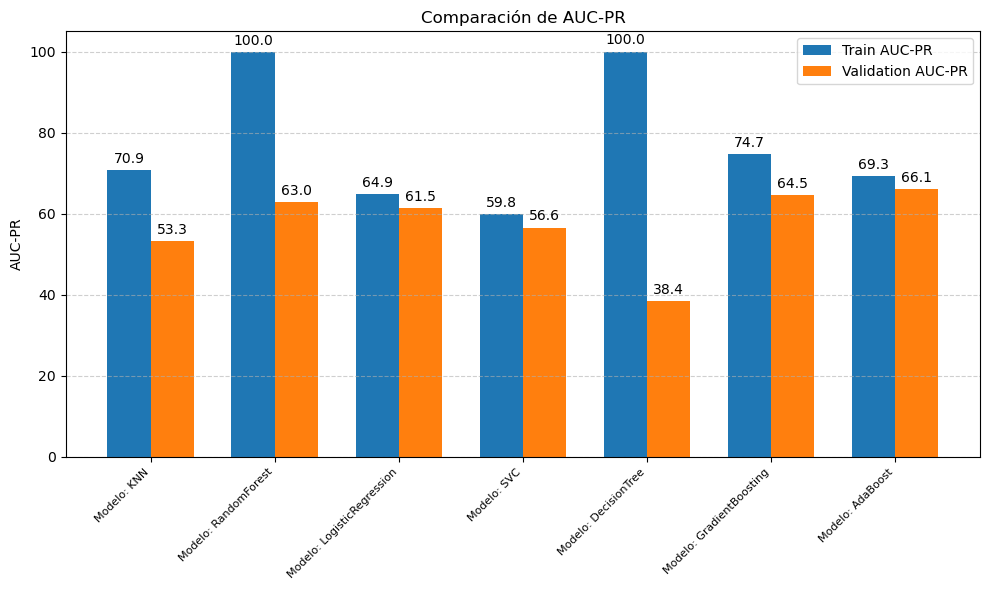

In [34]:
comparar_resultados(resultados)

Continuaremos utilizando un ensemble AdaBoost.

### Reducción de la dimensionalidad de los datos:

In [35]:
from sklearn.base import TransformerMixin

class corr_selection(TransformerMixin):

        # Constructor de la clase
        def __init__(self, umbral=0.9, verbose=False):
            # Umbral deseado para determinar variables correlacionadas
            self.umbral = umbral
            # Parámetro que determina si imprimir información del proceso o no
            self.verbose = verbose

        # Método fit
        def fit(self, X, y=None):
            # Transformamos X en DataFrame por si acaso llega en formato ndarray
            X = pd.DataFrame(X)
            # Calculamos la matriz de correlaciones con la función corr de pandas sobre el DataFrame con las variables de entrada X y la ponemos en valor absoluto
            correlaciones = X.corr().abs()
            # Seleccionamos el triángulo superior de la matriz de correlación
            upper = correlaciones.where(np.triu(np.ones(correlaciones.shape), k=1).astype('bool'))
            # Obtenemos los nombres de aquellas variables con correlación mayor al umbral deseado
            self.variables_a_eliminar = list(set([column for i,column in enumerate(upper.columns) if any(upper[column] > self.umbral)]))

             # Si queremos mostrar información se muestra el número de variables eliminadas y sus nombres
            if self.verbose:
                print('Se han eliminado {} variables, que son: {}'.format(len(self.variables_a_eliminar), self.variables_a_eliminar))
            # Devolvemos el objeto modificado (en este caso ha aprendido qué variables se deben eliminar al estar correlacionadas con otras)
            return self

        # Método transform
        def transform(self, X):
            # Transformamos X en DataFrame por si acaso llega en formato ndarray
            X = pd.DataFrame(X)
            # Creamos una copia del DataFrame X para no perder los datos originales
            X_uncorr = X.copy()
            # Eliminamos las variables con alta correlación con algunda de las variables de entrada
            X_uncorr.drop(self.variables_a_eliminar, axis=1, inplace=True)
            # Devolvemos el DataFrame transformado
            return X_uncorr

        # Método para asignar los valores de los híper-parámetros y que, de este modo, 
            # podamos aplicar GridSearchCV sobre un objeto de esta clase
        def set_params(self, **parameters):
            for parameter, value in parameters.items():
                setattr(self, parameter, value)
            return self

        # Método para obtener los valores de los híper-parámetros que queramos del modelo (lo usa GridSearchCV al mostrar la mejor configuración)
        def get_params(self, deep=True):
            # Devolvemos los valores de los híper-parámetros del método de preparación de datos
            return {"umbral": self.umbral}

In [36]:
from sklearn.feature_selection import SelectKBest, f_classif, SelectPercentile, RFE, RFECV
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier

# Lista de métodos de selección de variables con nombre e instancia
metodos_seleccion = [
    ('SinSeleccion', None),  # Baseline sin selección de variables
    ('Correlacion', corr_selection(umbral=0.9)),
    ('SelectKBest_10', SelectKBest(score_func=f_classif, k=10)),
    ('SelectPercentile_50', SelectPercentile(score_func=f_classif, percentile=50)),
    ('RFE_10', RFE(estimator=AdaBoostClassifier(random_state=0), n_features_to_select=10)),
    ('RFECV', RFECV(estimator=AdaBoostClassifier(random_state=0), cv=5)),
    ('PCA_0.95', PCA(n_components=0.95, svd_solver='full'))
]

resultados_seleccion = []

for nombre_metodo, selector in metodos_seleccion:
    # Preprocesadores (manteniendo tu estructura original)
    categorical_preprocessor = Pipeline(steps=[
        ('encoder', ce.TargetEncoder())
    ])
    
    nan_preprocessor = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('outlier_detector', OutlierDetecion_treatment_MeanStd())
    ])

    numerical_preprocessor = Pipeline(steps=[
        ('outlier_detector', OutlierDetecion_treatment_MeanStd())
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('categorical_preprocessor', categorical_preprocessor, variables_categoricas),
            ('nan_preprocessor', nan_preprocessor, variables_nan),
            ('numerical_preprocessor', numerical_preprocessor, variables_numericas_correctas)
        ]
    )

    # Construcción del pipeline
    steps = [('preprocessor', preprocessor)]
    if selector is not None:
        steps.append(('selector', selector))
    steps.append(('clf', AdaBoostClassifier(random_state=0)))
    
    modelo = Pipeline(steps)

    # Evaluación
    train_auc_pr, val_auc_pr, cm_train, cm_val = obtener_resultados(modelo, X_train, y_train, X_val, y_val)

    # Cálculo del número de características (versión simplificada y robusta)
    if selector is None:
        num_feats = X_train.shape[1]
    elif hasattr(selector, 'n_features_'):
        num_feats = selector.n_features_
    elif hasattr(selector, 'k'):
        num_feats = selector.k
    elif hasattr(selector, 'variables_a_eliminar'):
        num_feats = X_train.shape[1] - len(selector.variables_a_eliminar)
    else:
        num_feats = "N/A"

    # Guardar resultados (estructura simplificada)
    resultados_seleccion.append({
        "nombre_prueba": f"Selección: {nombre_metodo}",
        "train_auc_pr": train_auc_pr,
        "val_auc_pr": val_auc_pr,
        "num_features": num_feats
    })

# Resultados finales
df_resultados = pd.DataFrame(resultados_seleccion)
display(df_resultados.sort_values('val_auc_pr', ascending=False))

c:\Users\Carlos\anaconda3\envs\py311ml\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Carlos\anaconda3\envs\py311ml\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Carlos\anaconda3\envs\py311ml\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Carlos\anaconda3\envs\py311ml\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm t

,nombre_prueba,train_auc_pr,val_auc_pr,num_features
0,Selección: SinSeleccion,69.289851,66.067981,19
5,Selección: RFECV,69.289851,66.067981,15
1,Selección: Correlacion,69.137255,65.988730,18
4,Selección: RFE_10,68.469827,65.873503,10
2,Selección: SelectKBest_10,67.198128,65.109649,10
3,Selección: SelectPercentile_50,66.906520,64.776601,N/A
6,Selección: PCA_0.95,44.918336,39.301449,N/A


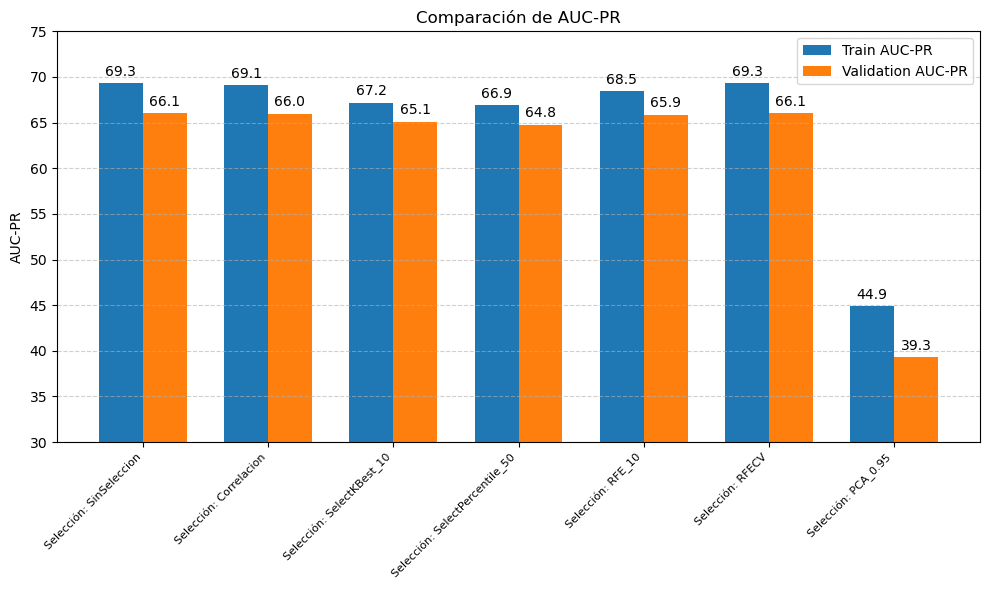

In [37]:
comparar_resultados(resultados_seleccion, y_lim=(30, 75))

No cambia mucho respecto al modelo sin seleccion pero, RFECV (mismo rendimiento, 4 variables menos) y RFE_10 (un pelín menos de rendimiento, la mitad de variables) por su equilibrio entre rendimiento y reducción de variables son las mejores opciones.
Se elije el método RFE_10.

### Filtros y Wrapper

In [40]:
# 3) Selección de variables: filtro uni-variable + wrapper recursivo
from sklearn.feature_selection import SelectKBest, f_classif, RFECV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold

# Define pasos de selección
filter_step = SelectKBest(score_func=f_classif, k=30)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
wrapper_step = RFECV(
    estimator=LogisticRegression(max_iter=1000),
    step=1,
    cv=cv,
    scoring='accuracy',
    min_features_to_select=5
)

filtroYWrapper = Pipeline([
    ('filter', filter_step),
    ('wrapper', wrapper_step),
])

filtros = ["passthrough", filtroYWrapper]

resultados = []

for filtro in filtros:
    # Preprocesamiento base
    categorical_preprocessor = Pipeline(steps=[
        ('binary_encoder', ce.BinaryEncoder())
    ])
    nan_preprocessor = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean'))
    ])
    
    # En este caso, no aplicamos nada a las variables numéricas correctas
    numerical_preprocessor = "passthrough"

    preprocessor = ColumnTransformer(
        transformers=[
            ('categorical', categorical_preprocessor, variables_categoricas),
            ('nan', nan_preprocessor, variables_nan),
            ('numerical', numerical_preprocessor, variables_numericas_correctas),
        ]
    )

    if filtro == "passthrough":
        modelo = Pipeline([
            ('preprocessor', preprocessor),
            ('scaler', StandardScaler()),
            ('knn', neighbors.KNeighborsClassifier())
        ])
    else:
        modelo = Pipeline([
            ('preprocessor', preprocessor),
            ('scaler', StandardScaler()),
            ('filter', filtro),
            ('knn', neighbors.KNeighborsClassifier())
        ])

    # Evaluación
    train_auc_pr, val_auc_pr, cm_train, cm_val = obtener_resultados(modelo, X_train, y_train, X_val, y_val)
    resultado = {
        "nombre_prueba": "Selector: " + str(filtro),
        "train_auc_pr": train_auc_pr,
        "val_auc_pr": val_auc_pr
    }
    resultados.append(resultado)


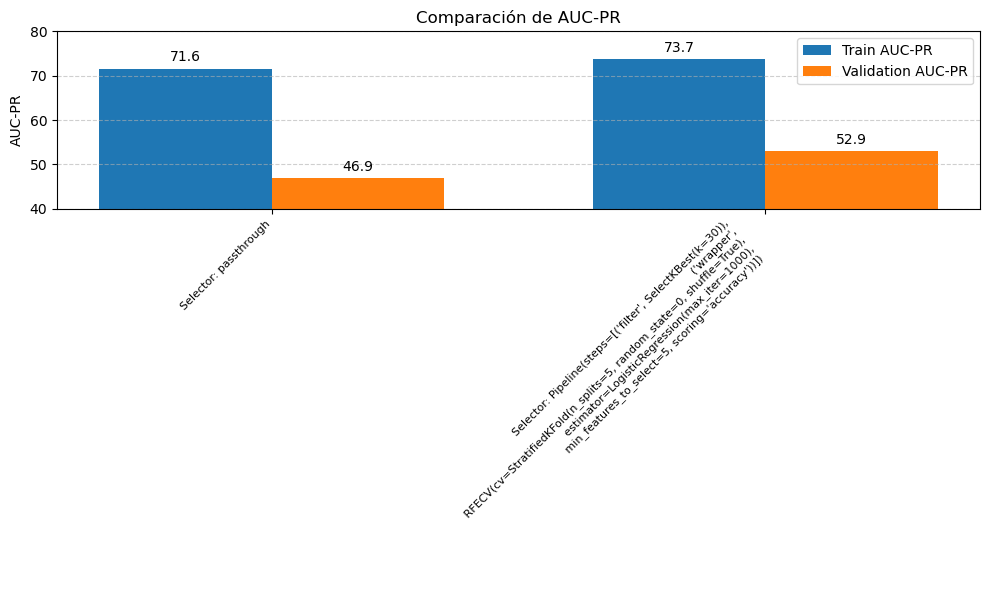

In [45]:
comparar_resultados(resultados, figsize=(10, 6), y_lim=(40, 80))